## PCA Sklearn

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Normalizing data set
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.decomposition import PCA
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

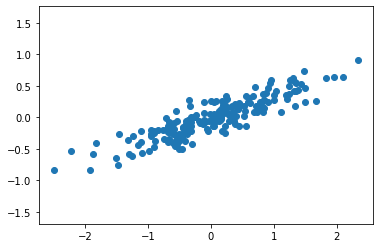

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. 

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

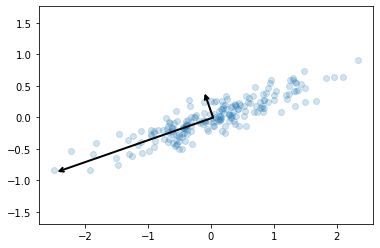

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. 

The projection of each data point onto the principal axes are the "principal components" of the data.

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


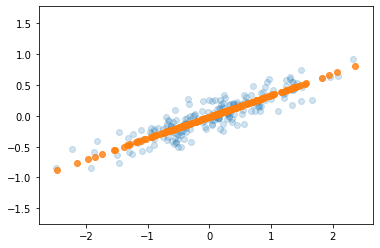

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The transformed data has been reduced to a single dimension. 

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. 

### PCA for data Visualization

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. 

You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

#### Dataset

In [25]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [26]:
# Separating labels from features

X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

### PCA

#### 1.Standardize data

When there are different scales used for the measurement of the values of the features, then it is advisable to do the standardization to bring all the feature spaces with mean = 0 and variance = 1.
The reason why standardization is very much needed before performing PCA is that PCA is very sensitive to variances. Meaning, if there are large differences between the scales (ranges) of the features, then those with larger scales will dominate over those with the small scales.
For example, a feature that ranges between 0 to 100 will dominate over a feature that ranges between 0 to 1 and it will lead to biased results. So, transforming the data to the same scales will prevent this problem. That is where we use standardization to bring the features with mean value 0 and variance 1.

In [13]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

#### 2. PCA projection to 2D

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [17]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


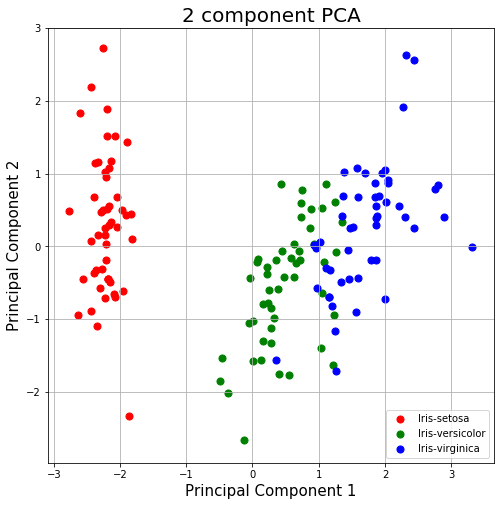

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [56]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## PCA for ML

### Dataset

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

### Splitting data in train and test

In [27]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### PCA

#### 1.Standardize data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training setonly.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

#### 2. PCA projection to 2D

In [29]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

#### 3. Fit PCA

In [30]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### 4.Applaying PCA to train and test set

In [31]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

##### 5. Using in ML

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_img, train_lbl)

C:\Users\Sampayo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting labels of new data

In [36]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [37]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

#### 6. Measuring model performance

In [38]:
logisticRegr.score(test_img, test_lbl)

0.9201

In [16]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [18]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### PCA with real dataset

In [64]:
df = pd.read_csv('E:\\Datasets\\bike-sharing\\train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('E:\\Datasets\\bike-sharing\\test.csv', parse_dates=['datetime'])

In [65]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [67]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour
    

add_features(df)
add_features(df_test)

In [68]:
df["count"] = df["count"].map(np.log1p)

In [70]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1


In [71]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1


#### Normalize the dataset

In [72]:
scaler = StandardScaler()

# Normalization parameters based on Training

cols_normalize = ['temp','atemp','humidity','windspeed']

scaler.fit(df[cols_normalize])

In [74]:
def transform_data(scaler, df, columns):
    transformed_data = scaler.transform(df[columns])
    df_transformed = pd.DataFrame(transformed_data, columns=columns)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
        
transform_data(scaler, df, cols_normalize)
transform_data(scaler, df_test, cols_normalize)

In [77]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,3,13,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,8,32,3.713572,2011,1,1,5,1


#### PCA

In [78]:
# Find PCA
pca = PCA(n_components=0.9) # Capture 90% total variation

In [81]:
# Find new components
cols_for_pca = ['temp','atemp','humidity','windspeed']

pca.fit(df[cols_for_pca])

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
# No. of PCA Components
print ('Variance: ', pca.n_components)
print ('No. of components to keep: ', pca.n_components_)

Variance:  0.9
No. of components to keep:  3


In [84]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(df[columns])
    
    tcols = []
    for i in range(pca.n_components_):       
        tcols.append('component_' + str(i))
    
    print ('components:',tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

new_cols = transform_with_pca(pca, df, cols_for_pca)
transform_with_pca(pca, df_test, cols_for_pca)

components: ['component_0', 'component_1', 'component_2']
components: ['component_0', 'component_1', 'component_2']


['component_0', 'component_1', 'component_2']

In [85]:
df.head(2)

,datetime,season,holiday,workingday,weather,casual,registered,count,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-01 00:00:00,1,0,0,1,3,13,2.833213,2011,1,1,5,0,-1.727078,-1.773606,-0.523238
1,2011-01-01 01:00:00,1,0,0,1,8,32,3.713572,2011,1,1,5,1,-1.861064,-1.733926,-0.569779


In [86]:

df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095


#### ML

In [97]:
from sklearn.model_selection import train_test_split

df_train = df.loc[:,df.columns.difference(['count', 'datetime']) ] # Features
y = df.loc[:,'count'].ravel() # Target

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3)


In [106]:
y

array([2.83321334, 3.71357207, 3.49650756, ..., 5.12989871, 4.86753445,
       4.48863637])

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

X_train = np.asarray(X_train)

y_train = np.asarray(y_train)
print(utils.multiclass.type_of_target(y_train))
      
y_train = LabelEncoder().fit_transform(y_train)
      
print(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous
[466  91 365 ... 127 445   7]
multiclass


In [114]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(criterion='gini',max_depth=5,max_features=2,max_leaf_nodes=5,n_estimators=100)
    
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
clf_rf.predict(X_test)

array([10, 15, 15, ..., 10, 11, 10], dtype=int64)

In [118]:
for name, importance in zip(df_train.columns, clf_rf.feature_importances_):
...     print(name, "=", importance)

casual = 0.23840500560962477
component_0 = 0.034113934920401094
component_1 = 0.04471095792061676
component_2 = 0.023239330645135503
day = 0.0028789557869239694
dayofweek = 0.011254084560795711
holiday = 0.00024410275035169937
hour = 0.19376743882632425
month = 0.020451499619549965
registered = 0.36885311053746994
season = 0.046419336782933
weather = 0.0013474210597165
workingday = 0.007011514987999587
year = 0.0073033059921573055


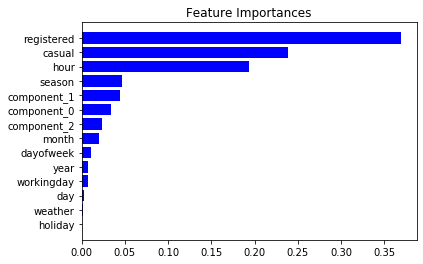

In [120]:
features = df_train.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()